# Practica 6: Astronomia Galactica
Juan David Galan Vargas - 202111470

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

c:\Users\juang\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
c:\Users\juang\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


In [2]:
df=pd.read_csv(r"C:\Users\juang\Documents\Tareas JD\Universidad\Materias\7 Semestre\Astronomia Galactica\result.csv")
df.shape

(118218, 14)

In [3]:
df = df.dropna(subset=['Plx'])
df.shape

(117955, 14)

In [20]:
df = df.sort_values(by='Plx', ascending=False)
# Print or use the sorted DataFrame as needed
df=df.head(1000)
df.shape
#df.head()

(1000, 14)

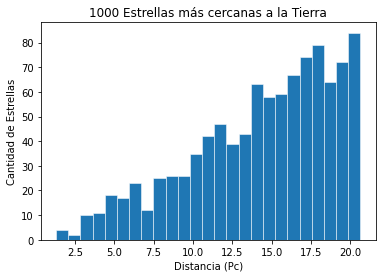

In [21]:
result_list = [1000 / i for i in df['Plx']]

plt.hist(result_list, bins=25, linewidth=0.5, edgecolor="white")
#plt.grid(True)
plt.xlabel("Distancia (Pc)")
plt.ylabel("Cantidad de Estrellas")
plt.title("1000 Estrellas más cercanas a la Tierra")
plt.show()

In [6]:
from scipy.optimize import curve_fit

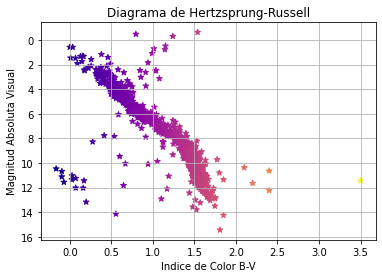

In [22]:
color= df['B-V']
mag= df['Vmag']
mag=list(mag)
def M_abs(D, m):
    result=[]
    for i in range(1000):
        a= m[i] + 5* np.log10(10/D[i])
        result.append(a)
    return result
mabs= M_abs(result_list, mag)
colores= list(color)
plt.scatter(color,mabs,c=colores, marker='*',cmap="plasma")
plt.gca().invert_yaxis()
plt.grid(True)
plt.title("Diagrama de Hertzsprung-Russell")
plt.xlabel("Indice de Color B-V")
plt.ylabel("Magnitud Absoluta Visual")
plt.show()

In [ ]:
from matplotlib import cm

Text(0.5, 1.0, 'Indice de Color Vs Estrellas')

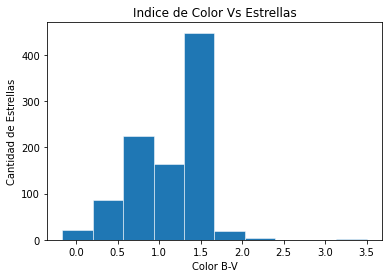

In [ ]:
color= df['B-V']
plt.hist(color, bins=10, linewidth=0.5, edgecolor="white")
plt.xlabel("Color B-V")
plt.ylabel("Cantidad de Estrellas")
plt.title("Indice de Color Vs Estrellas")

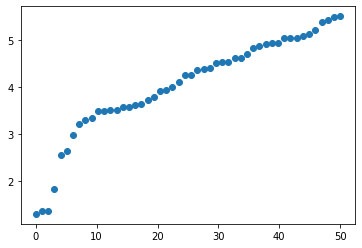

In [ ]:
ind= np.linspace(0,50,50)
plt.scatter(ind, result_list)

In [ ]:
new_df = []
for i in range(len(df) - 1):
    current_row = df.iloc[i]
    next_row = df.iloc[i + 1]
    # Check if the difference in "Plx" is less than 0.1
    if abs(current_row['Plx'] - next_row['Plx']) < 0.5:
        # Append both rows to the list
        new_df.extend([current_row, next_row])

# Create the final DataFrame by concatenating the list of DataFrames
df_binarias = pd.concat(new_df, axis=1).T.reset_index(drop=True)
print(df_binarias)

       HIP        RAhms        DEdms   Vmag      RAICRS     DEICRS     Plx  \
0    71681  14 39 39.39  -60 50 22.1   1.35  219.914128 -60.839471  742.12   
1    71683  14 39 40.90  -60 50 06.5  -0.01   219.92041 -60.835147  742.12   
2    91768  18 42 48.22  +59 37 33.7   8.94  280.700906  59.626016  280.28   
3     1475  00 18 20.54  +44 01 19.0   8.09    4.585591  44.021956  280.27   
4    86162  17 36 26.41  +68 20 32.0   9.15  264.110027  68.342227  220.85   
5    85523  17 28 39.46  -46 53 35.0   9.38  262.164404 -46.893052  220.43   
6   114110  23 06 38.89  -14 52 20.6  12.24  346.662032 -14.872397  216.52   
7    57367  11 45 39.26  -64 50 26.4   11.5  176.413598 -64.840674   216.4   
8    82725  16 54 32.15  -62 24 13.5  11.72  253.633948 -62.403741  203.01   
9    85605  17 29 36.19  +24 39 11.6  11.39  262.400787  24.653221  202.69   
10   85605  17 29 36.19  +24 39 11.6  11.39  262.400787  24.653221  202.69   
11  106440  21 33 34.02  -49 00 25.3   8.66  323.391734 -49.0070

In [ ]:
eli=[2,3,6,7,10,11,12,13,14,15]
df_filtered = df_binarias.drop(eli)
df_filtered

,HIP,RAhms,DEdms,Vmag,RAICRS,DEICRS,Plx,pmRA,pmDE,e_Plx,B-V,Notes,_RA_icrs,_DE_icrs
0,71681,14 39 39.39,-60 50 22.1,1.35,219.914128,-60.839471,742.12,-3600.35,952.11,1.4,0.9,D,219.89617,-60.837156
1,71683,14 39 40.90,-60 50 06.5,-0.01,219.92041,-60.835147,742.12,-3678.19,481.84,1.4,0.71,D,219.902066,-60.833975
4,86162,17 36 26.41,+68 20 32.0,9.15,264.110027,68.342227,220.85,-320.47,-1269.55,0.92,1.505,,264.107916,68.339141
5,85523,17 28 39.46,-46 53 35.0,9.38,262.164404,-46.893052,220.43,573.32,-879.84,1.63,1.553,,262.166443,-46.89519
8,82725,16 54 32.15,-62 24 13.5,11.72,253.633948,-62.403741,203.01,254.79,173.56,29.27,NaN,D,253.635285,-62.40332
9,85605,17 29 36.19,+24 39 11.6,11.39,262.400787,24.653221,202.69,97.33,348.92,39.48,1.101,D,262.401047,24.65407
